## Air quality Predication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RepeatedKFold

from tpot import TPOTRegressor

%matplotlib inline

### Get Dataset

In [2]:
data = pd.read_csv('../../data/Air Quality Dataset.csv')
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [4]:
data.isna().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [5]:
data = data.dropna()
print(data.shape)
data.isna().sum()

(1092, 9)


T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

### Data analysis

In [6]:
dep_var = 'PM 2.5'
def create_train_test_splits():
    y = data[dep_var]
    X = data.drop(columns=[dep_var], axis=1)
    return train_test_split(X, y, test_size=0.10, random_state=1)

X_train, X_test, y_train, y_test = create_train_test_splits()
print(f'X Train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y Train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X_train.head()

X Train shape: (982, 8)
X test shape: (110, 8)
y Train shape: (982,)
y test shape: (110,)


,T,TM,Tm,SLP,H,VV,V,VM
85,29.8,38.6,24.6,997.9,71.0,2.3,12.6,16.5
65,34.1,42.0,23.7,1001.4,29.0,1.9,9.3,18.3
205,12.7,19.5,7.0,1012.0,66.0,1.4,9.3,25.9
206,15.3,22.6,5.6,1013.6,67.0,1.6,4.8,11.1
187,12.7,19.8,5.2,1017.9,78.0,1.3,5.4,14.8


C:\Users\okmic\.conda\envs\tpot_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


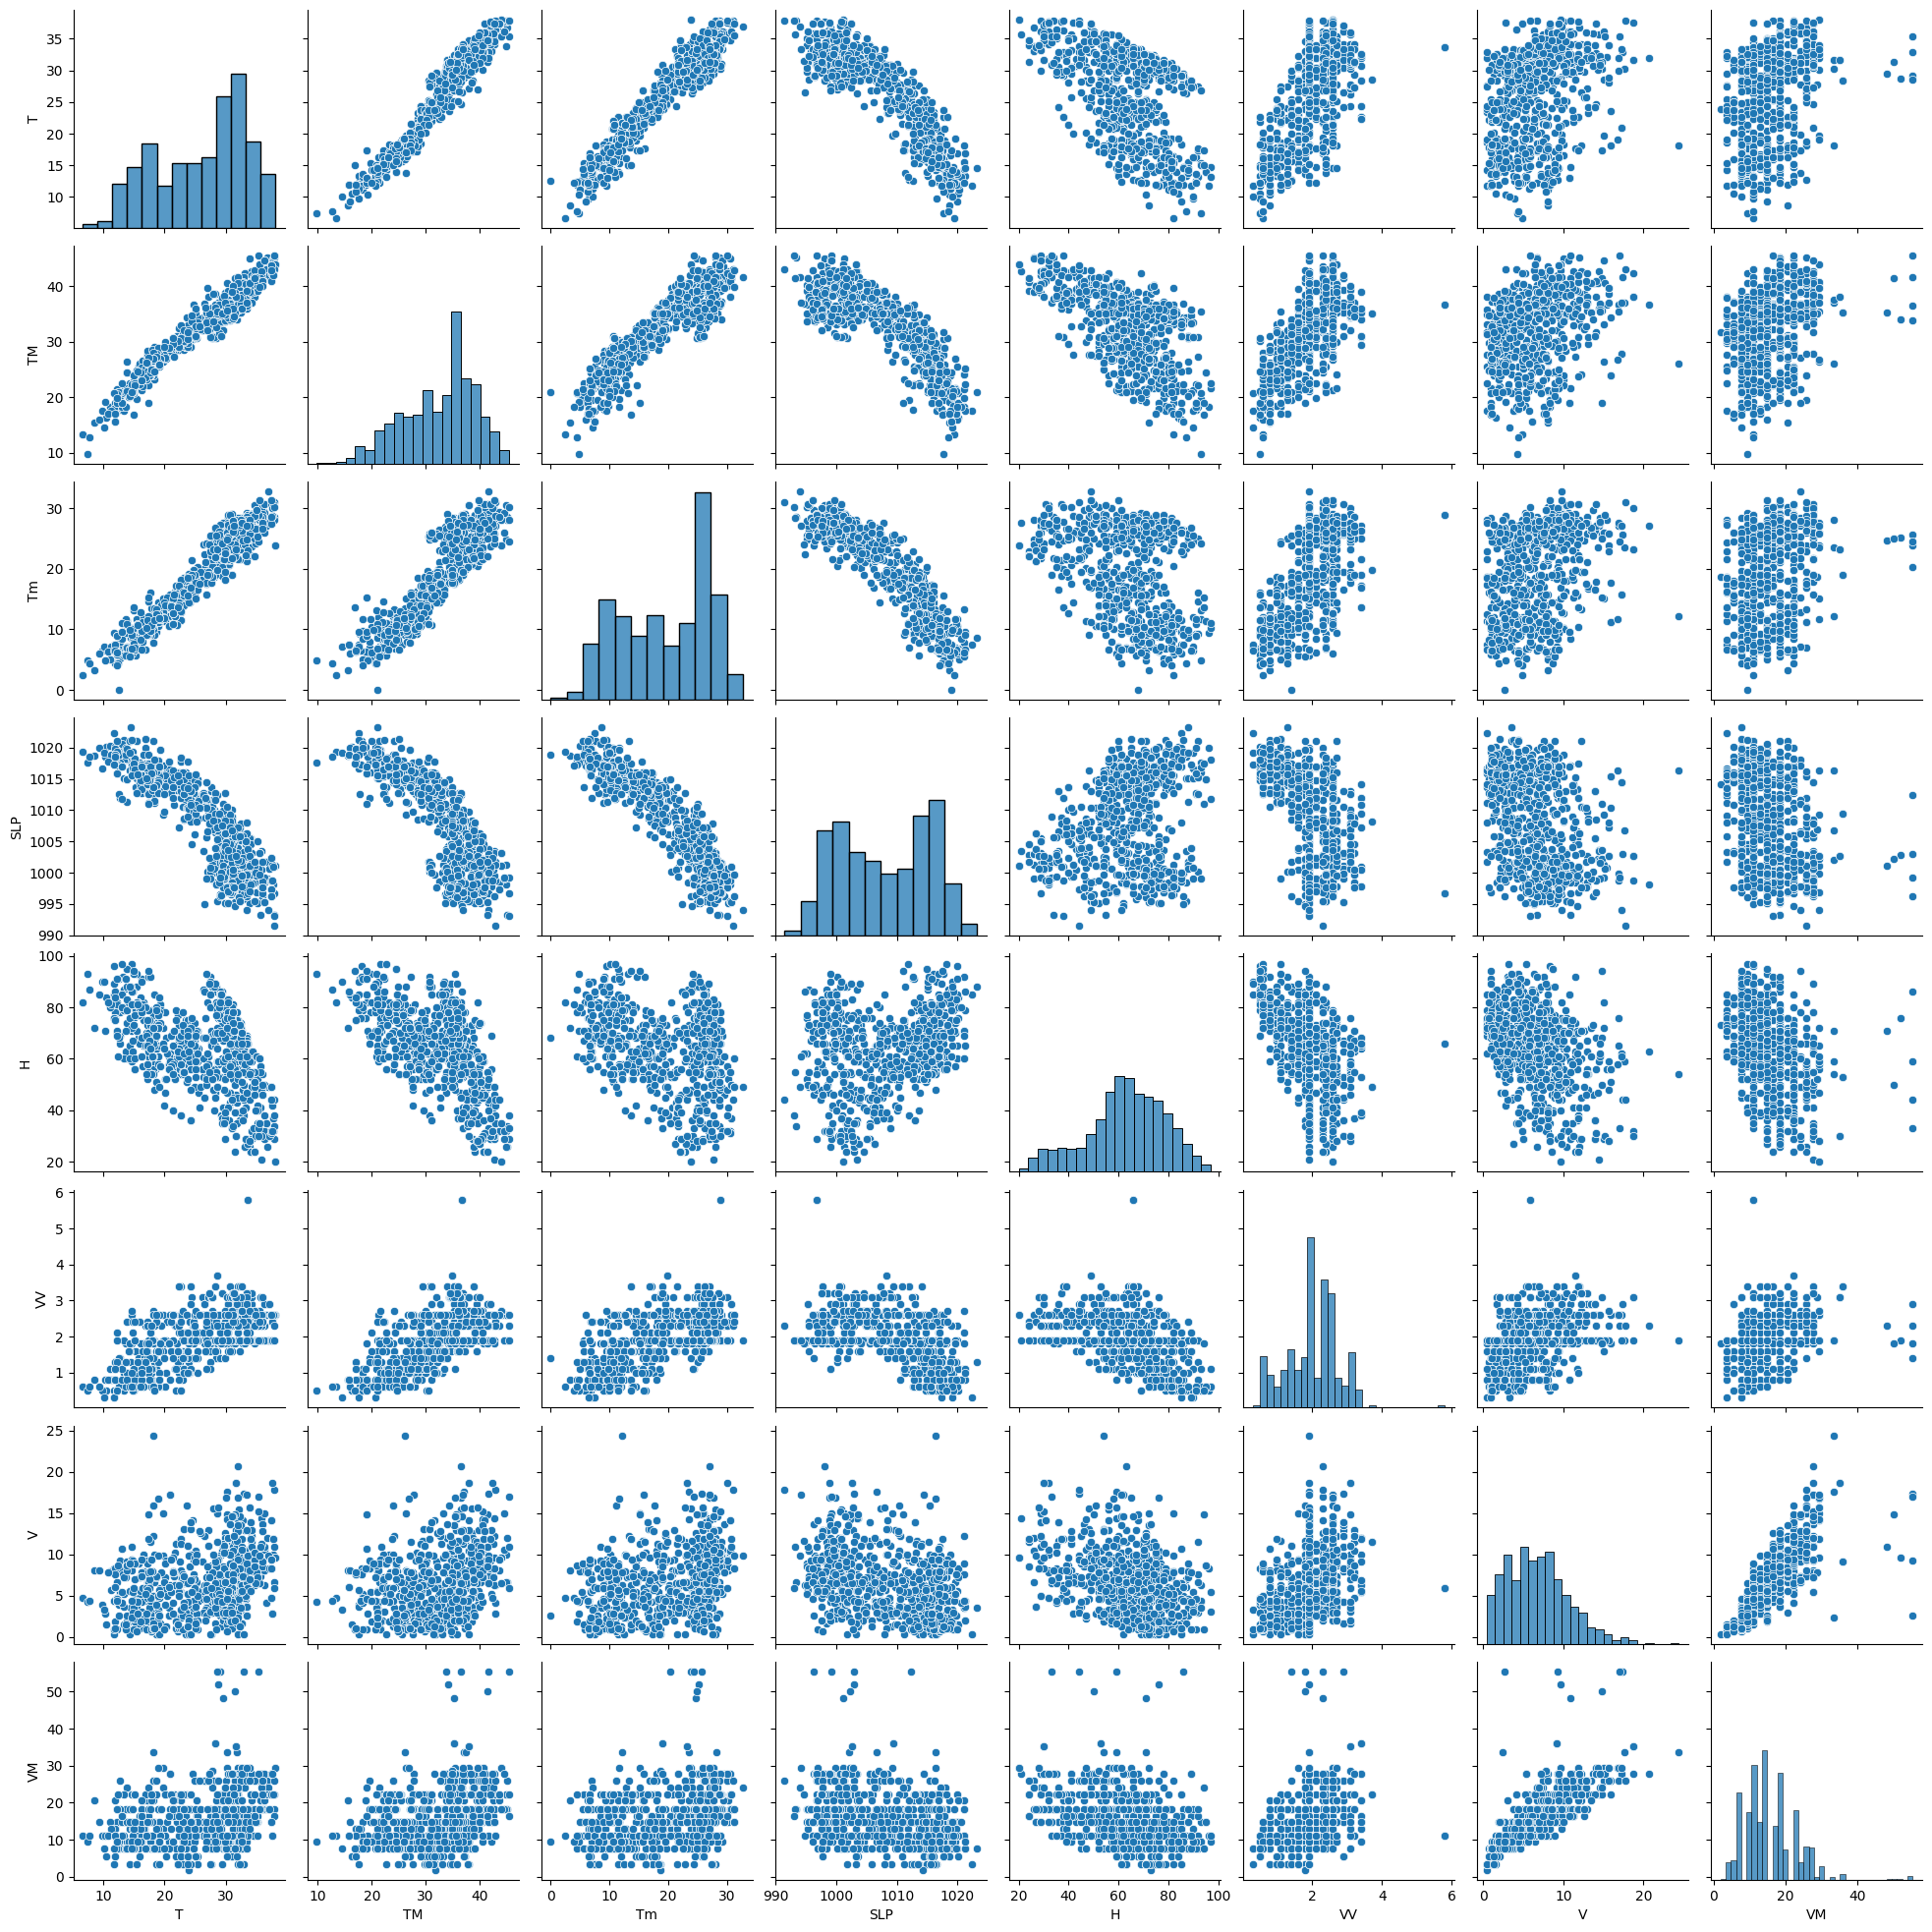

In [7]:
sns.pairplot(X_train)

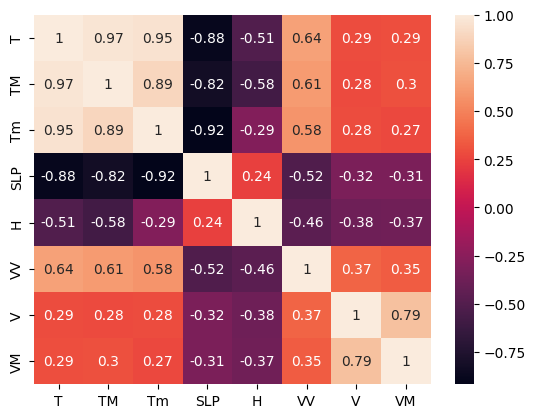

In [8]:
sns.heatmap(X_train.corr(), annot=True);

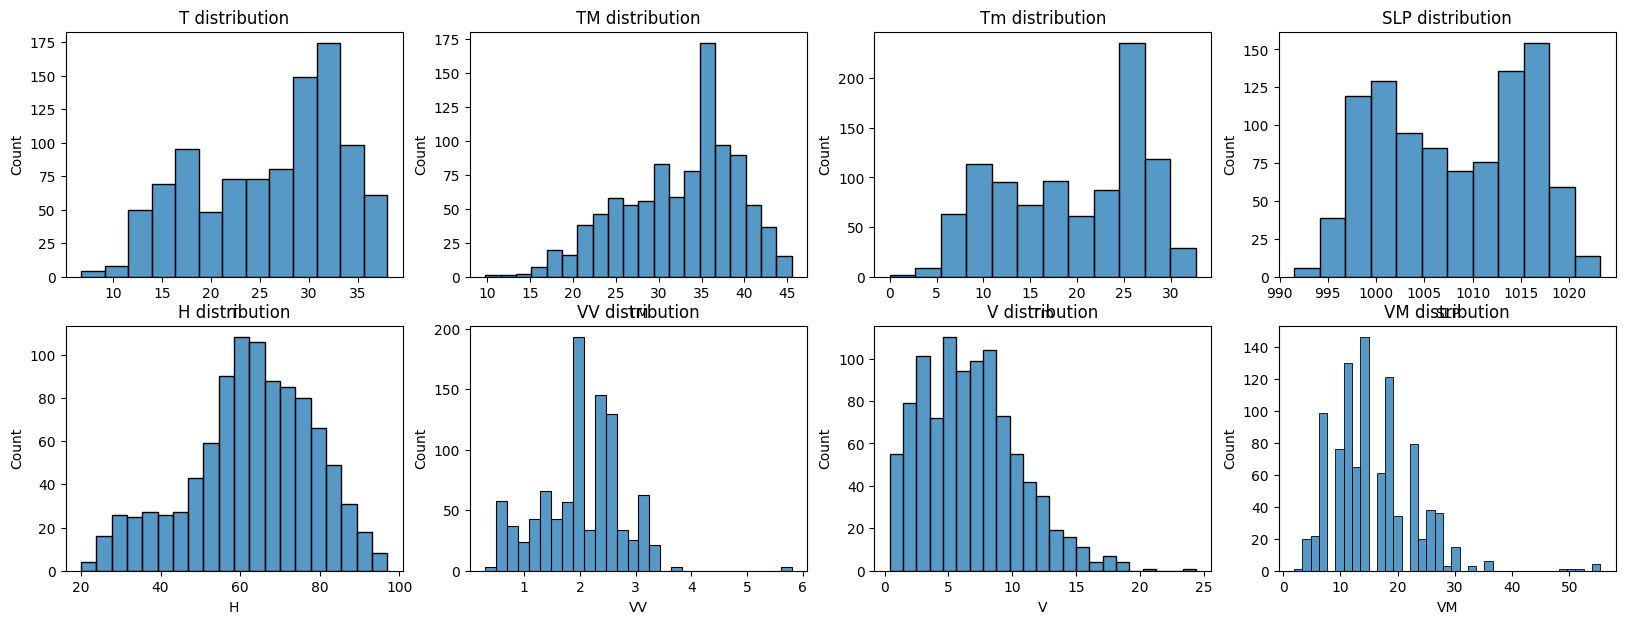

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 7))

col_index = 0
p_columns = X_train.columns
for row in range(0, 2):
    for col in range(0, 4):
        axes[row][col].set_title(f'{p_columns[col_index]} distribution')
        sns.histplot(X_train, x=p_columns[col_index], ax=axes[row][col])
        col_index = col_index+1

### AutoML with TPOT

In [10]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
regression_model = TPOTRegressor(
    generations=10, 
    population_size=50, 
    scoring='r2',
    verbosity=2, 
    n_jobs=4,
    cv=cv,
    random_state=42   
)
regression_model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8283626826534446

Generation 2 - Current best internal CV score: 0.8317289312405941

Generation 3 - Current best internal CV score: 0.8317289312405941

Generation 4 - Current best internal CV score: 0.8393449154254048

Generation 5 - Current best internal CV score: 0.8393449154254048

Generation 6 - Current best internal CV score: 0.8449567828939241

Generation 7 - Current best internal CV score: 0.8449567828939241

Generation 8 - Current best internal CV score: 0.8544052989304173

Generation 9 - Current best internal CV score: 0.8544052989304173

Generation 10 - Current best internal CV score: 0.8544052989304173

Best pipeline: GradientBoostingRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.25, min_samples_leaf=4, min_samples_split=8, n_estimators=100), alpha=0.9, learning_rate=0.1, loss=huber, max_depth=8, max_features=0.35000000000000003, min_samples_leaf=1, min_samples_split=9, n_estimators=100, subsample

TPOTRegressor(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
              generations=10, n_jobs=4, population_size=50, random_state=42,
              scoring='r2', verbosity=2)

In [11]:
regression_model.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=ExtraTreesRegressor(max_features=0.25,
                                                                 min_samples_leaf=4,
                                                                 min_samples_split=8,
                                                                 random_state=42))),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(loss='huber', max_depth=8,
                                           max_features=0.35000000000000003,
                                           min_samples_split=9, random_state=42,
                                           subsample=0.8500000000000001))])

In [12]:
# you can loop through this dict keys to find all pipelines that were evaluated
# print(regression_model.evaluated_individuals_)

{'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=11, RandomForestRegressor__min_samples_split=9, RandomForestRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': 0.6908546307515535}, 'RandomForestRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.75, ElasticNetCV__tol=0.01), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.4, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=14, RandomForestRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': 0.6571999134969226}, 'AdaBoostRegressor(input_matrix, AdaBoostRegressor__learning_rate=1.0, AdaBoostRegressor__loss=exponential, AdaBoostRegr

In [13]:
def reg_metrics(y_true, pred):
    print('MAE:', mean_absolute_error(y_true, pred))
    print('MAPE: ', mean_absolute_percentage_error(y_true, pred))
    print('MSE:', mean_squared_error(y_true, pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_true, pred)))
    print('R2:', r2_score(y_true, pred))
    

In [14]:
y_train_pred = regression_model.predict(X_train)
reg_metrics(y_train_pred, y_train)

MAE: 1.8562555622109973
MAPE:  0.06199759633660113
MSE: 8.6295722951728
RMSE: 2.9376133672035194
R2: 0.9987672720286178


/Users/Michael_Enudi/opt/anaconda3/envs/tpt/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


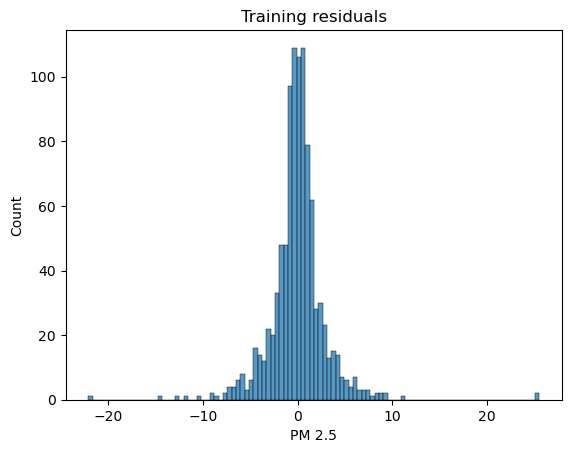

In [15]:
sns.histplot(y_train-y_train_pred);
plt.title('Training residuals');

### Evaluating with test set

In [16]:
y_pred = regression_model.predict(X_test)
reg_metrics(y_test, y_pred)
print(regression_model.score(X_test, y_test))

MAE: 13.86587666114413
MAPE:  1675851958343562.0
MSE: 712.3432072320859
RMSE: 26.689758470845813
R2: 0.902334586997798
0.902334586997798


/Users/Michael_Enudi/opt/anaconda3/envs/tpt/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/Michael_Enudi/opt/anaconda3/envs/tpt/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


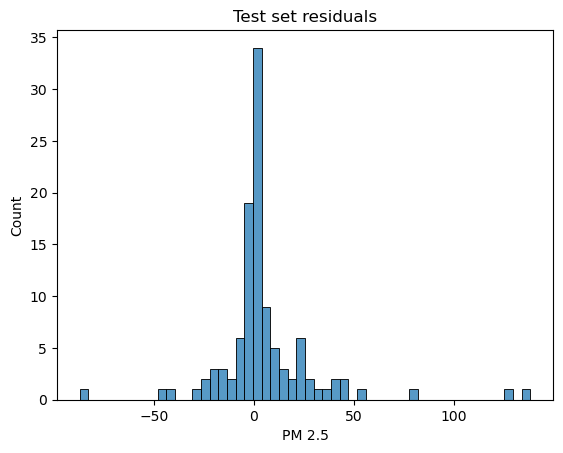

In [17]:
sns.histplot(y_test-y_pred);
plt.title('Test set residuals');

### Export the pipeline to python code

In [18]:
regression_model.export('air_quality_index_prediction_pipeline.py')